In [2]:
import matplotlib.pyplot as plt
import torch
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn import datasets, manifold
import numpy as np
n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

In [9]:
import math
res=0
for i in range(1,12):
    res-=i/11*math.log(i/11,2)
res

3.908576875260588

In [2]:
import time 


In [5]:
start=time.time()

In [9]:
interval=time.time()-start
time.strftime("%H:%M:%S", time.gmtime(interval))

'00:02:22'

In [7]:
math.log(1/2)

-0.6931471805599453

In [7]:
S_points

array([[ 0.44399868,  0.89358664, -0.10397256],
       [ 0.89724097,  1.67398073, -1.44154121],
       [ 0.8240493 ,  0.44364806, -0.43348191],
       ...,
       [ 0.49067571,  0.64722742,  1.87134227],
       [ 0.92134435,  1.62709003,  1.38874746],
       [-0.54434825,  1.39480076,  1.83885934]])

In [6]:
print(S_points.shape)

(1500, 3)


In [36]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(10, 10), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


# plot_3d(S_points, S_color, "Original S-curve samples")

In [ ]:
def label_color(labels,color):
    '''
    labels: labels of sample
    color: color of class
    
    return: color of sample
    '''
    colors=['']*labels.shape[0]
    for i,label in enumerate(labels):
        colors[i]=color[label]
    return colors

def tsne_pro(fea,n_components=2,verbose=1,random_state=42):
    tsne=TSNE(n_components=n_components,verbose=verbose,random_state=random_state)
    res_fea=tsne.fit_transform(fea)
    scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
    result = scaler.fit_transform(res_fea)
    return result


color = ['#FFFAFA', '#BEBEBE', '#000080', '#87CEEB', '#006400',
         '#00FF00', '#4682B4', '#D02090', '#8B7765', '#B03060','#FF0000']


In [6]:
fea_path='save_fea/pre_fea.pt'
label_path='save_fea/pre_label.pt'
pseudo_path='save_fea/pseudo_labels.pt'
fea=torch.load(fea_path,map_location=torch.device('cpu') )
labels=torch.load(label_path,map_location=torch.device('cpu'))
pseudo_labels=torch.load(pseudo_path,map_location=torch.device('cpu'))

In [53]:
unique,count=np.unique(labels,return_counts=True)

In [55]:
sum(count[:-1])

235

In [7]:
mean_fea=None
for label in range(len(np.unique(labels))):
    if isinstance(mean_fea,torch.Tensor):
        mean_fea=torch.cat([mean_fea,torch.unsqueeze(fea[labels==label].mean(dim=0),0)],dim=0)
    else:   
        mean_fea=torch.unsqueeze(fea[labels==label].mean(dim=0),0)

c:\Users\10913\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\10913\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 502 samples in 0.000s...
[t-SNE] Computed neighbors for 502 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 502 / 502
[t-SNE] Mean sigma: 0.305497
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.998131
[t-SNE] KL divergence after 1000 iterations: 0.451353


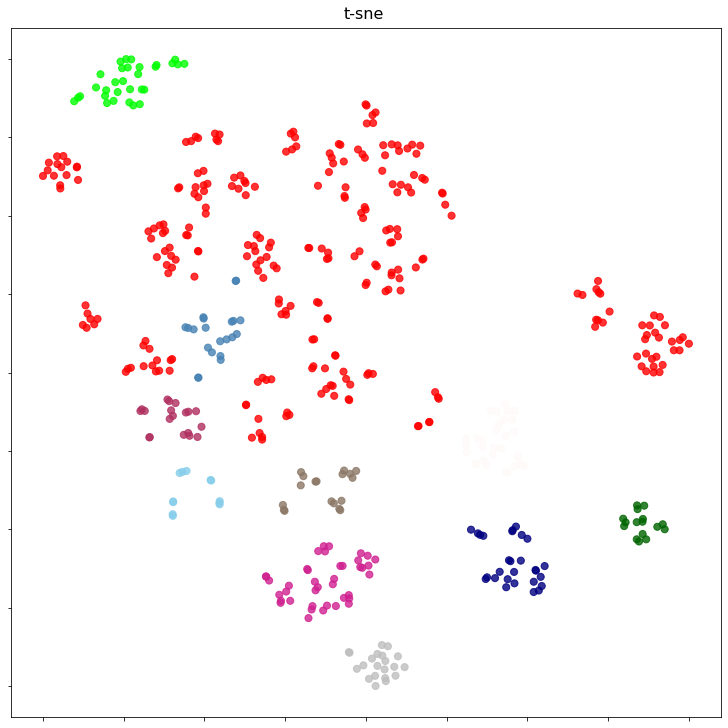

In [51]:
fea_tsne=tsne_pro(fea)
colors=z(labels,color)
# plt.scatter(result[:,0], result[:,1], result[:2],c=labels, s=10)
plot_2d(fea_tsne,colors,'t-sne')

In [45]:
pse_colors=['']*fea_tsne.shape[0]
for i,label in enumerate(pseudo_labels):
    pse_colors[i]=color[label]

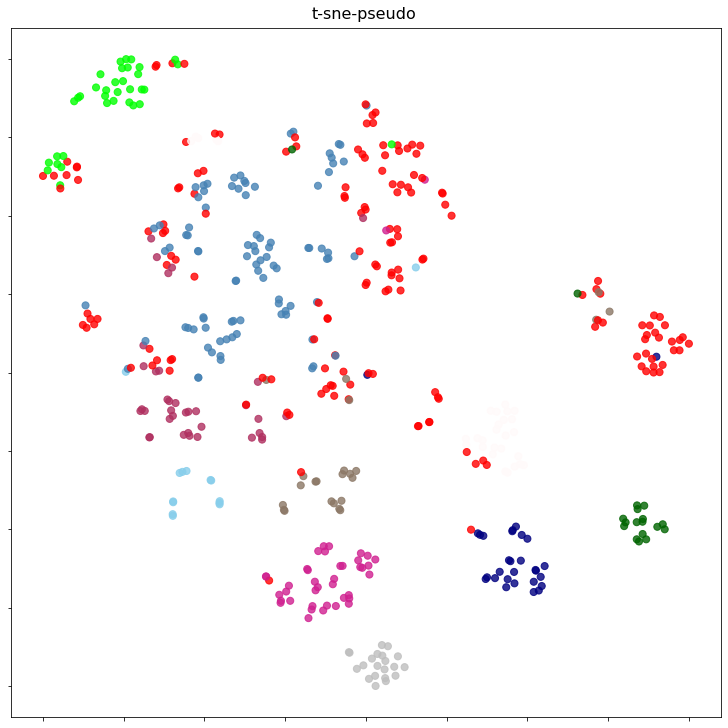

In [47]:
plot_2d(fea_tsne,pse_colors,'t-sne-pseudo')

In [4]:
fea_path='save_fea/pre_fea.pt'
label_path='save_fea/pre_label.pt'
pseudo_path='save_fea/pseudo_labels.pt'
cls_path='save_fea/pre_tar_cls.pt'
cls=torch.load(cls_path,map_location=torch.device('cpu'))
fea=torch.load(fea_path,map_location=torch.device('cpu') )
labels=torch.load(label_path,map_location=torch.device('cpu'))
pseudo_labels=torch.load(pseudo_path,map_location=torch.device('cpu'))

In [50]:
import time
t = time.localtime()
t.tm_year, t.tm_mon, t.tm_mday,t.tm_hour, t.tm_min, t.tm_sec 

(2023, 9, 15, 11, 4, 53)

In [46]:
Cu=10
preds_index = torch.max(cls, 1)[1].tolist()
preds_value = torch.max(cls, 1)[0].tolist()
for i,value in enumerate(preds_value):
    if value<0.999:
        preds_index[i]=Cu
preds_index

[0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 0,
 0,
 0,
 10,
 10,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 10,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 10,
 5,
 10,
 5,
 5,
 10,
 5,
 5,
 5,
 10,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 10,
 5,
 5,
 5,
 5,
 10,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 10,
 7,
 7,
 7,
 7,
 7,
 10,
 7,
 7,
 7,
 7,
 7,
 10,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 10,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 10,
 10,
 

In [39]:
preds

[0.9999964833259583,
 1.0,
 1.0,
 0.9999857544898987,
 0.9999564290046692,
 0.9934200644493103,
 0.9999365210533142,
 0.9999998211860657,
 0.9999814033508301,
 0.9999721646308899,
 0.9995042085647583,
 0.9999992847442627,
 0.9269959330558777,
 1.0,
 0.9999998211860657,
 0.9999999403953552,
 0.9441148042678833,
 0.7044754028320312,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999986886978149,
 0.9999994039535522,
 0.9999993443489075,
 1.0,
 0.9999595284461975,
 1.0,
 0.9999999403953552,
 0.9999999403953552,
 1.0,
 1.0,
 0.9999998807907104,
 0.9999986290931702,
 1.0,
 1.0,
 0.9999986886978149,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999991059303284,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999403953552,
 0.9999995231628418,
 0.9999997019767761,
 1.0,
 0.9999982118606567,
 1.0,
 0.9999992251396179,
 1.0,
 1.0,
 0.999910831451416,
 1.0,
 0.9999972581863403,
 0.9999999403953552,
 1.0,
 0.9999994039535522,
 1.0,
 1.0,
 0.9998807907104492,
 0.9994244575500488,
 0.99

In [32]:
for i,cl in enumerate(cls):
    preds,index= torch.max(cl,0)
            # print('preds:',preds[0],'ouput len:',outputs.size())
    crossloss=-cl[int(preds)]
    crossloss+=torch.log(torch.sum(torch.exp(cl)))
    print(labels[i],crossloss,preds,index)

tensor(0, dtype=torch.int32) tensor(1.5434) tensor(1.0000) tensor(0)
tensor(0, dtype=torch.int32) tensor(2.5430) tensor(1.) tensor(0)
tensor(0, dtype=torch.int32) tensor(2.5430) tensor(1.) tensor(0)
tensor(0, dtype=torch.int32) tensor(1.5440) tensor(1.0000) tensor(0)
tensor(0, dtype=torch.int32) tensor(1.5446) tensor(1.0000) tensor(0)
tensor(0, dtype=torch.int32) tensor(1.5624) tensor(0.9934) tensor(0)
tensor(0, dtype=torch.int32) tensor(1.5450) tensor(0.9999) tensor(0)
tensor(0, dtype=torch.int32) tensor(1.5431) tensor(1.0000) tensor(0)
tensor(0, dtype=torch.int32) tensor(1.5439) tensor(1.0000) tensor(0)
tensor(0, dtype=torch.int32) tensor(1.5441) tensor(1.0000) tensor(0)
tensor(0, dtype=torch.int32) tensor(1.5477) tensor(0.9995) tensor(0)
tensor(0, dtype=torch.int32) tensor(1.5433) tensor(1.0000) tensor(0)
tensor(0, dtype=torch.int32) tensor(1.6403) tensor(0.9270) tensor(0)
tensor(0, dtype=torch.int32) tensor(2.5431) tensor(1.) tensor(0)
tensor(0, dtype=torch.int32) tensor(1.5431) te

In [2]:
import math
math.log(25,2)

4.643856189774724

In [54]:
import logging
# 设置打印日志的级别，level级别以上的日志会打印出
# level=logging.DEBUG 、INFO 、WARNING、ERROR、CRITICAL
def log_testing():
    # 此处进行Logging.basicConfig() 设置，后面设置无效
    logging.basicConfig(filename='log.txt',
                     format = '%(asctime)s - %(name)s - %(levelname)s - %(message)s-%(funcName)s',
                     level=logging.DEBUG)
    logging.debug('debug，用来打印一些调试信息，级别最低')
    logging.info('info，用来打印一些正常的操作信息')
    logging.warning('waring，用来用来打印警告信息')
    logging.error('error，一般用来打印一些错误信息')
    logging.critical('critical，用来打印一些致命的错误信息，等级最高')

log_testing()

ERROR:root:error，一般用来打印一些错误信息
CRITICAL:root:critical，用来打印一些致命的错误信息，等级最高


In [39]:
import math
def BuildHeap(nums,n):#从位置n开始建堆,除了该元素 后续元素已经建好了堆
    length=len(nums)
    print('length',length)
    height=int(math.log(length,2))
    j=n
    print(height)
    for i in range(0,height):
        
        if j*2+1>length-1:
                break
        elif j*2+2>length-1:#已经是迭代的最后一层了
            num=nums[j]
            left=nums[j*2+1]
            nums[j]=max(num,left)
            nums[j*2+1]=min(num,left)
            # print('Swap {} and {}'.format(num,left))
            # print('loc {} and {}'.format(j,j*2+1))
        else:
            num=nums[j]
            left=nums[j*2+1]
            right=nums[j*2+2]
            if num>max(left,right):#符合大根堆条件
                continue
            elif left>right:
                max_index=j*2+1
                max_value=left
            else:
                max_index=j*2+2
                max_value=right
            nums[j]=max_value
            nums[max_index]=num
            j=max_index
            
    return nums

def maxHeap(nums):
    max_num=nums[0]
    nums[0]=nums[-1]
    nums.pop()
    if len(nums)==2:
        nums=BuildHeap(nums,0)
            
    return max_num,nums

def findKthLargest(nums, k: int) -> int:
        length=len(nums)
        heap=[num for num in nums]
        #建堆
        height=int(math.log(length,2))#从第0层开始
        print(heap,height)
        for i in range(height-1,-1,-1):
            for j in range(2**i-1,2**(i+1)-1):#遍历该层
                print(i,j)
                if j*2+1>length-1:
                    break
                elif j*2+2>length-1:
                    num=nums[j]
                    left=nums[j*2+1]
                    nums[j]=max(num,left)
                    nums[j*2+1]=min(num,left)
                    print('Swap {} and {}'.format(num,left))
                    print('loc {} and {}'.format(j,j*2+1))
                else:
                    num=nums[j]
                    left=nums[j*2+1]
                    right=nums[j*2+2]
                    if num>max(left,right):#符合大根堆条件
                        continue
                    elif left>right:
                        max_index=j*2+1
                        max_value=left
                    else:
                        max_index=j*2+2
                        max_value=right
                    nums[j]=max_value
                    nums[max_index]=num
                    print('Swap {} and {}'.format(num,max_value))
                    print('loc {} and {}'.format(j,max_index))
                    nums=BuildHeap(nums,max_index)
        res=nums[0]
        for i in range(k):
            res,nums=maxHeap(nums)
        return res

        return nums
a =[2,1]
a_sorted=findKthLargest(a,2)
a_sorted

[2, 1] 1
0 0
Swap 2 and 1
loc 0 and 1


1

In [43]:
def HOS(unk,os_Star):
    return 2*unk*os_Star/(unk+os_Star)
unk=80
os_Star=25
hos=HOS(unk,os_Star)
hos

38.095238095238095

In [27]:


max_num,nums=maxHeap(a_sorted)

2


In [7]:
domain=['imageclef-p.csv','imageclef-c.csv','imageclef-i.csv']
for tg in domain:
    t=domain.copy()
    t.remove(tg)
    scs=t
    print(tg,scs)

imageclef-p.csv ['imageclef-c.csv', 'imageclef-i.csv']
imageclef-c.csv ['imageclef-p.csv', 'imageclef-i.csv']
imageclef-i.csv ['imageclef-p.csv', 'imageclef-c.csv']


In [24]:
import heapq
a = []   #创建一个空堆
heapq.heappush(a,18)
heapq.heappush(a,1)
heapq.heappush(a,20)
heapq.heappush(a,10)
heapq.heappush(a,5)
heapq.heappush(a,200)
print(a)

# [heapq.heappop(a) for i in range(len(a))]
# heapq.heappop(a)

[1, 5, 20, 18, 10, 200]


In [30]:
a[0]
heapq.heappop(a)


200

In [32]:
bigger_num=[1,2]
smaller_num=[]
big=heapq.heappop(bigger_num)
heapq.heappush(smaller_num,-big)
meadian=(big+bigger_num[0])/2

In [40]:
class MedianFinder:
    
    def __init__(self):
        self.bigger_num=[]#较大数组建立小根堆
        self.smaller_num=[]#较小数组建立大根堆
        self.length=0
        self.median=None#中位数默认存在bigger_num中
        # self.if_exist=0# 0 表示该中位数不存在于两个数组中， 1表示存在于bigger_num 中

    def addNum(self, num: int) -> None:
        if self.length==0:
            self.meadian=num
            heapq.heappush(self.bigger_num,num)#默认放到bigger
            self.length+=1
            return
        if num>=self.meadian:
            heapq.heappush(self.bigger_num,num)
        else:
            heapq.heappush(self.smaller_num,-num)
        print(self.bigger_num)
        print(self.smaller_num)
        #接下来进行处理长度大小关系
        if len(self.bigger_num)>len(self.smaller_num)+1:#大2 pop一个出来给small
            big=heapq.heappop(self.bigger_num)
            heapq.heappush(self.smaller_num,-big)
            self.meadian=(big+self.bigger_num[0])/2
        elif len(self.bigger_num)==len(self.smaller_num)+1:
            self.meadian=(self.bigger_num[0])
        elif len(self.bigger_num)==len(self.smaller_num):
            self.meadian=(self.bigger_num[0]-self.smaller_num[0])/2
        elif len(self.bigger_num)+1==len(self.smaller_num):
            self.meadian=-smaller_num[0]
        else: #pop 一个给bigger
            small=-heapq.heappop(self.smaller_num)
            heapq.heappush(self.bigger_num,small)
            self.meadian=(small-self.smaller_num[0])/2
        self.length+=1
        

    def findMedian(self) -> float:
        return self.meadian
    
num=MedianFinder()
num.addNum(-1)
print(num.findMedian())
# print(num.bigger_num,num.smaller_num)
num.addNum(-2)
print(num.findMedian())
num.addNum(-3)
print(num.findMedian())
num.addNum(-4)
print(num.findMedian())
num.addNum(-5)
print(num.findMedian())

-1
[-1]
[2]
-1.5
[-1]
[2, 3]
1
[-1]
[2, 3, 4]
-2.5
[-2, -1]
[3, 4, 5]
1


In [56]:
nums = [1,1,1,2,2,3,4]
count={}
for num in nums:
    if num in count:
        count[num]+=1
    else:
        count[num]=1
count.values()

dict_values([3, 2, 1, 1])

In [4]:
nums1=[1,2,3,4]
nums2=[3,4,5,6,6]
flag, ans = (n := len(nums1)) > (m := len(nums2)), []

SyntaxError: invalid syntax (3582542961.py, line 3)